In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the Data

In [23]:
from ucimlrepo import fetch_ucirepo

data = fetch_ucirepo(id=45)

X = data.data.features
y = data.data.targets

# Exploratory Analysis Dataset 1

In [24]:
data.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [25]:
df = pd.merge(X, y, left_index=True, right_index=True)

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [28]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [29]:
df.loc[df['thal'].isna() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2


In [30]:
df.loc[df['ca'].isna() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [31]:
df = df.dropna(axis=0)

In [32]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<Axes: xlabel='num', ylabel='count'>

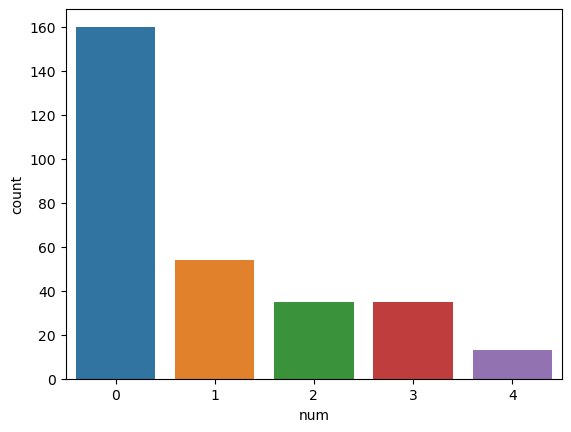

In [33]:
sns.countplot(data=df, x='num')

<Axes: >

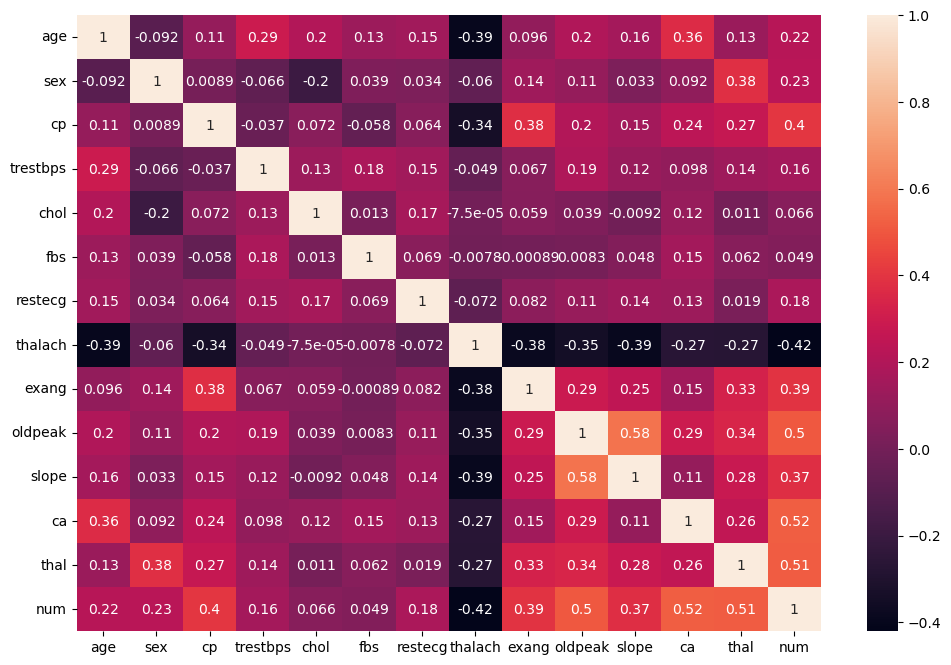

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

In [35]:
df.to_csv('./datasets/heart_disease.csv', index=False)

# Creating the Model

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
def classification(clf, X_train, y_train, X_test, y_test, param_grid):
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    print(classification_report(y_test, y_pred))
    if (isinstance(clf, DecisionTreeClassifier)):
        print("Height of the tree is : ", grid.best_estimator_.tree_.max_depth)
        print(grid.best_estimator_)
        return grid.best_estimator_
    return grid.best_params_
    

Fitting 5 folds for each of 150 candidates, totalling 750 fits
0.6666666666666666
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.50      0.17      0.25         6
           2       0.00      0.00      0.00         2
           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         1

    accuracy                           0.67        30
   macro avg       0.33      0.32      0.31        30
weighted avg       0.64      0.67      0.63        30

Height of the tree is :  4
DecisionTreeClassifier(min_samples_leaf=20)


d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5294117647058824, 0.9, 'x[12] <= 4.5\ngini = 0.656\nsamples = 267\nvalue = [141, 48, 33, 33, 12]'),
 Text(0.29411764705882354, 0.7, 'x[11] <= 0.5\ngini = 0.399\nsamples = 146\nvalue = [111, 20, 7, 6, 2]'),
 Text(0.17647058823529413, 0.5, 'x[0] <= 58.5\ngini = 0.223\nsamples = 104\nvalue = [91, 11, 2, 0, 0]'),
 Text(0.11764705882352941, 0.3, 'x[7] <= 160.5\ngini = 0.101\nsamples = 76\nvalue = [72, 3, 1, 0, 0]'),
 Text(0.058823529411764705, 0.1, 'gini = 0.261\nsamples = 27\nvalue = [23, 3, 1, 0, 0]'),
 Text(0.17647058823529413, 0.1, 'gini = 0.0\nsamples = 49\nvalue = [49, 0, 0, 0, 0]'),
 Text(0.23529411764705882, 0.3, 'gini = 0.457\nsamples = 28\nvalue = [19, 8, 1, 0, 0]'),
 Text(0.4117647058823529, 0.5, 'x[9] <= 0.65\ngini = 0.69\nsamples = 42\nvalue = [20, 9, 5, 6, 2]'),
 Text(0.35294117647058826, 0.3, 'gini = 0.576\nsamples = 21\nvalue = [13, 3, 2, 2, 1]'),
 Text(0.47058823529411764, 0.3, 'gini = 0.748\nsamples = 21\nvalue = [7, 6, 3, 4, 1]'),
 Text(0.7647058823529411, 0.7, 'x

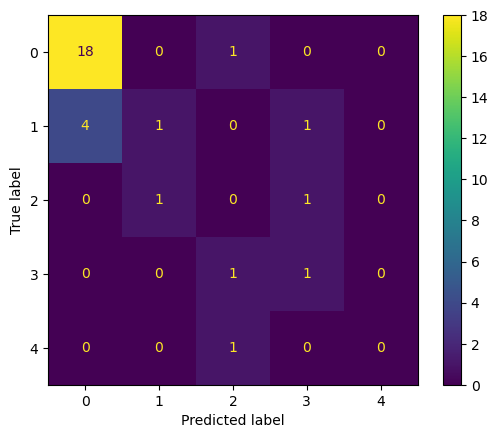

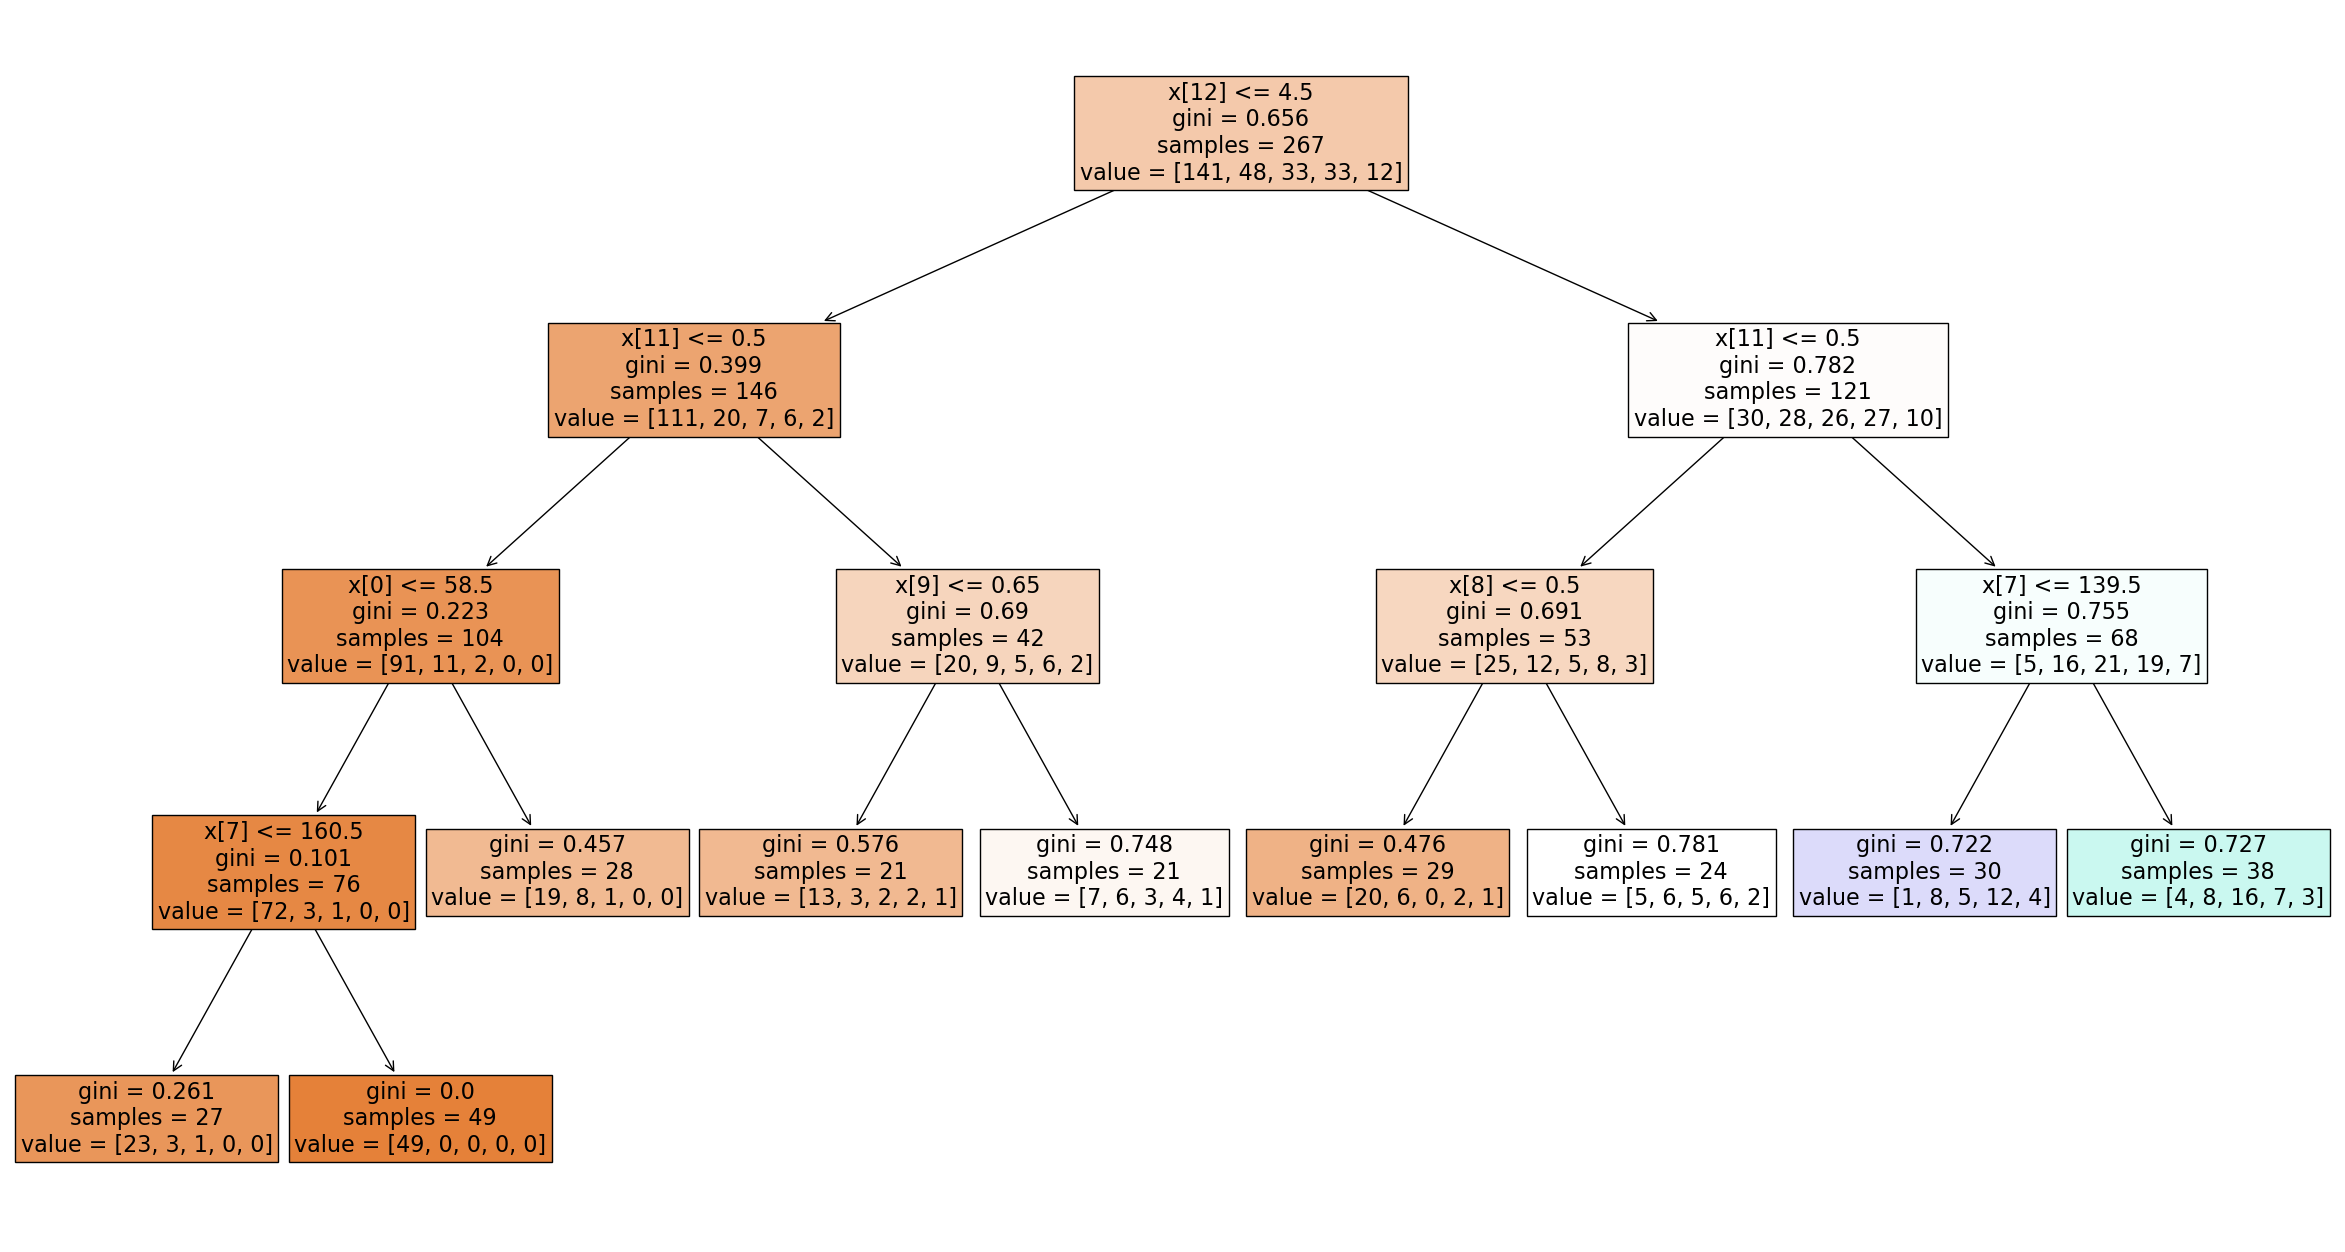

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20]
}

best_est = classification(DecisionTreeClassifier(criterion='gini'), X_train, y_train, X_test, y_test, param_grid)
plt.figure(figsize=(30, 16))
plot_tree(best_est, filled=True, fontsize=16)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.6666666666666666
              precision    recall  f1-score   support

           0       0.70      1.00      0.83        19
           1       1.00      0.17      0.29         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.67        30
   macro avg       0.34      0.23      0.22        30
weighted avg       0.65      0.67      0.58        30



d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

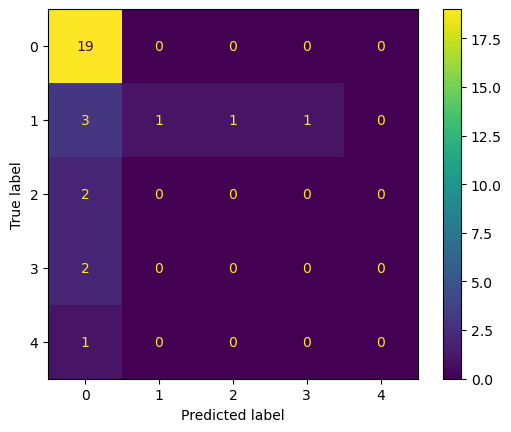

In [18]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

classification(KNeighborsClassifier(), X_train, y_train, X_test, y_test, param_grid)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.6666666666666666
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.29      0.33      0.31         6
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.67        30
   macro avg       0.35      0.35      0.35        30
weighted avg       0.69      0.67      0.68        30



{}

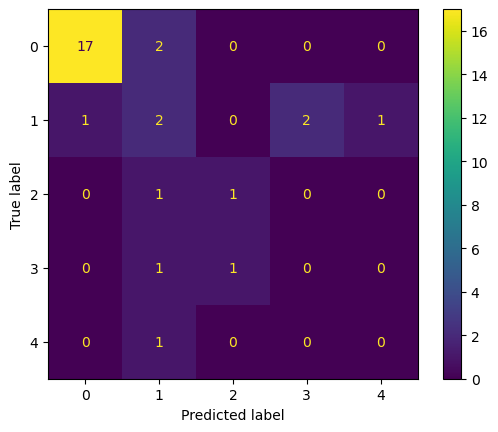

In [19]:
from sklearn.naive_bayes import GaussianNB

classification(GaussianNB(), X_train, y_train, X_test, y_test, {})

Fitting 5 folds for each of 32 candidates, totalling 160 fits
0.6
              precision    recall  f1-score   support

           0       0.67      0.95      0.78        19
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.60        30
   macro avg       0.13      0.19      0.16        30
weighted avg       0.42      0.60      0.50        30



d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 100, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

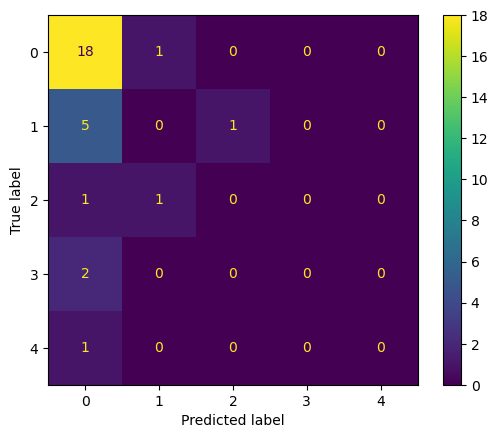

In [20]:
from sklearn.svm import SVC

svc = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale'],
    'kernel': ['rbf', 'poly'],
    'degree': [2, 3, 4, 5],
}

classification(svc, X_train, y_train, X_test, y_test, param_grid)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CART classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5333333333333333


# Wine Dataset

In [36]:
wine = fetch_ucirepo(id=109) 

In [37]:
X = wine.data.features 
y = wine.data.targets 

df = pd.merge(X, y, left_index=True, right_index=True)
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [38]:
wine.variables

,name,role,type,demographic,description,units,missing_values
0,class,Target,Categorical,None,None,None,no
1,Alcohol,Feature,Continuous,None,None,None,no
2,Malicacid,Feature,Continuous,None,None,None,no
3,Ash,Feature,Continuous,None,None,None,no
4,Alcalinity_of_ash,Feature,Continuous,None,None,None,no
5,Magnesium,Feature,Integer,None,None,None,no
6,Total_phenols,Feature,Continuous,None,None,None,no
7,Flavanoids,Feature,Continuous,None,None,None,no
8,Nonflavanoid_phenols,Feature,Continuous,None,None,None,no
9,Proanthocyanins,Feature,Continuous,None,None,None,no


<Axes: xlabel='class', ylabel='count'>

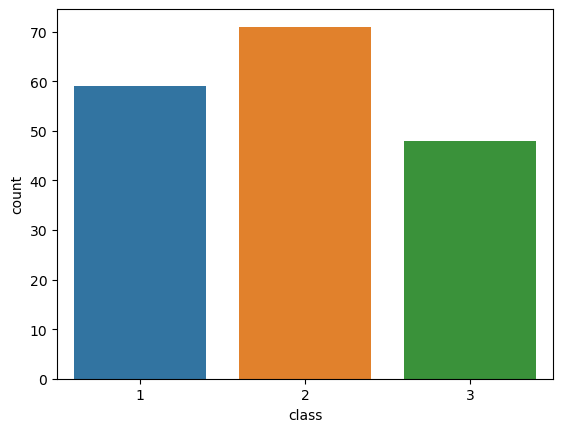

In [39]:
sns.countplot(data=df, x='class')

<Axes: >

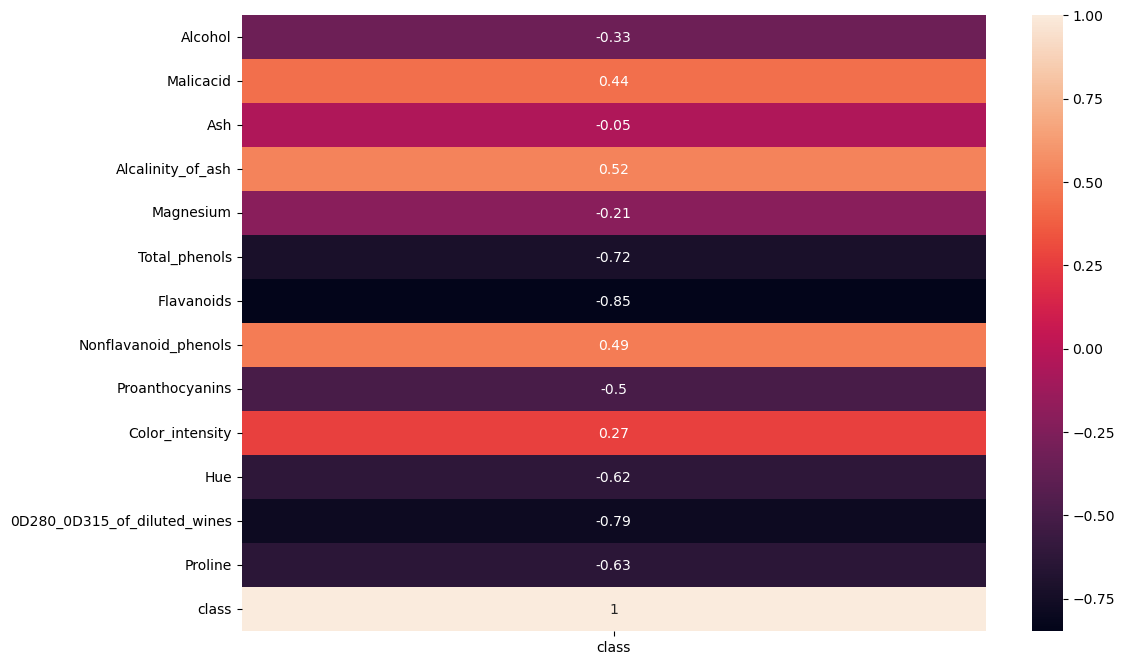

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr()[['class']], annot=True)

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
0.8888888888888888
              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.78      1.00      0.88         7
           3       1.00      0.75      0.86         4

    accuracy                           0.89        18
   macro avg       0.93      0.87      0.89        18
weighted avg       0.91      0.89      0.89        18

Height of the tree is :  4
DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)


[Text(0.5, 0.9, 'x[9] <= 3.82\ngini = 0.659\nsamples = 160\nvalue = [52, 64, 44]'),
 Text(0.3, 0.7, 'x[12] <= 1002.5\ngini = 0.1\nsamples = 57\nvalue = [3, 54, 0]'),
 Text(0.2, 0.5, 'x[2] <= 2.85\ngini = 0.036\nsamples = 55\nvalue = [1, 54, 0]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 53\nvalue = [0, 53, 0]'),
 Text(0.3, 0.3, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.7, 0.7, 'x[6] <= 1.4\ngini = 0.582\nsamples = 103\nvalue = [49, 10, 44]'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 44\nvalue = [0, 0, 44]'),
 Text(0.8, 0.5, 'x[12] <= 724.5\ngini = 0.282\nsamples = 59\nvalue = [49, 10, 0]'),
 Text(0.7, 0.3, 'x[12] <= 679.0\ngini = 0.165\nsamples = 11\nvalue = [1, 10, 0]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.8, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]')]

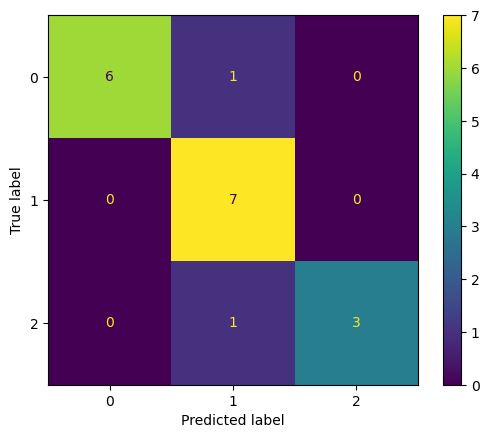

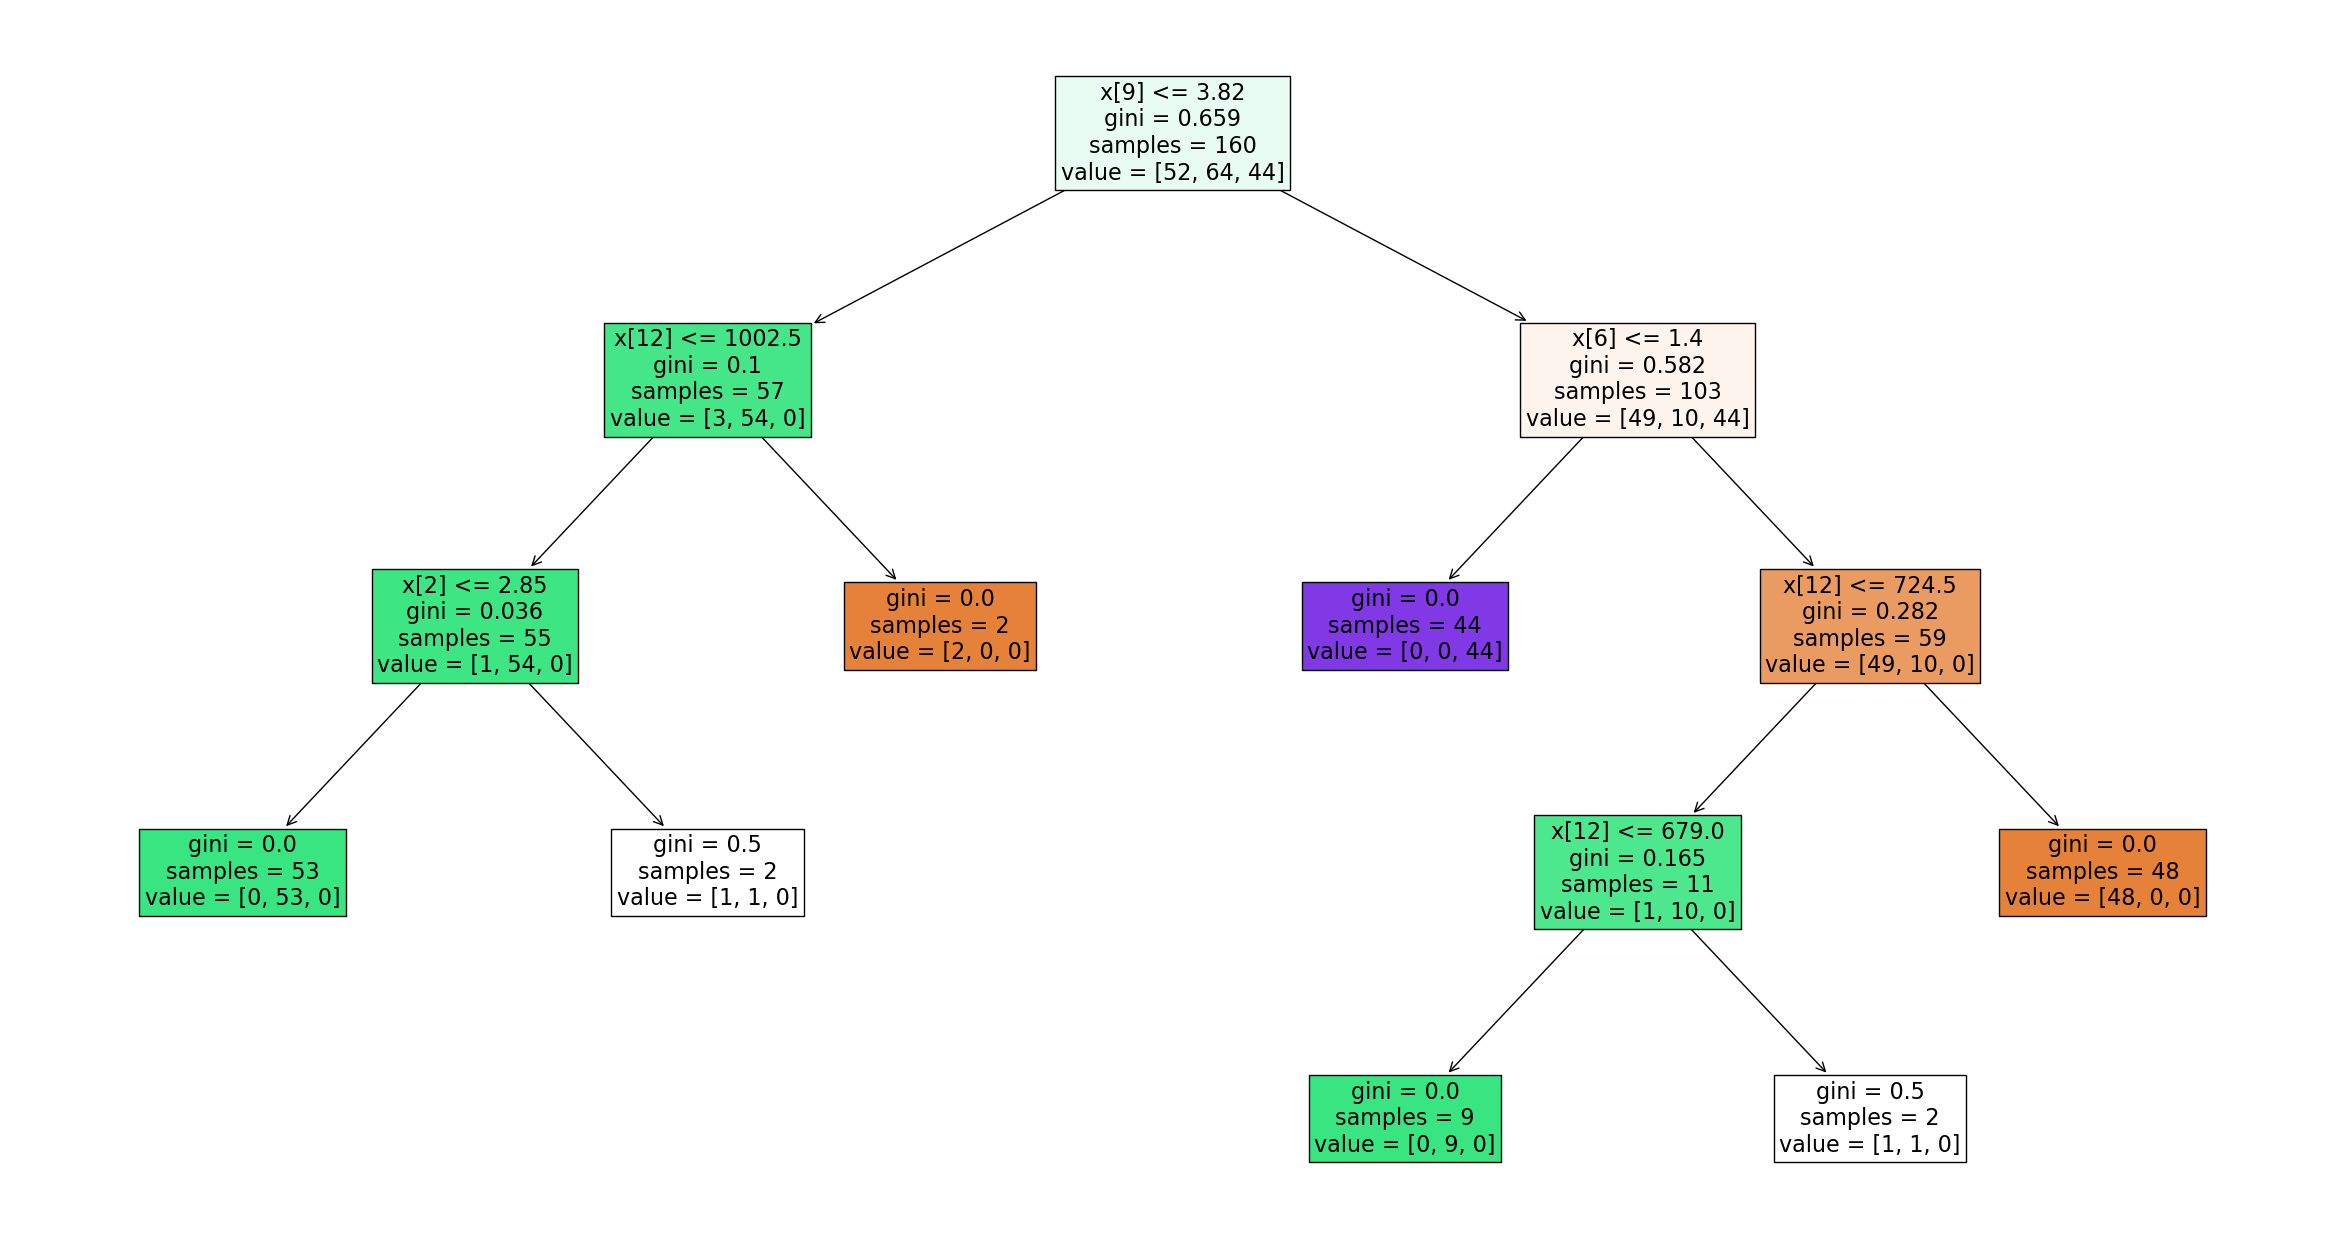

In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20]
}

best_est = classification(DecisionTreeClassifier(criterion='gini'), X_train, y_train, X_test, y_test, param_grid)
plt.figure(figsize=(30, 16))
plot_tree(best_est, filled=True, fontsize=16)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.8333333333333334
              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           2       1.00      0.86      0.92         7
           3       0.57      1.00      0.73         4

    accuracy                           0.83        18
   macro avg       0.86      0.86      0.83        18
weighted avg       0.90      0.83      0.84        18



{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

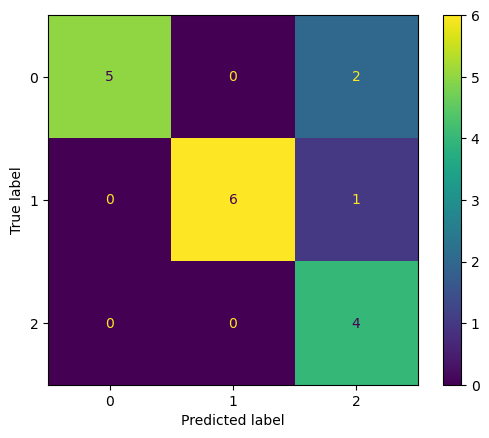

In [54]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

classification(KNeighborsClassifier(), X_train, y_train, X_test, y_test, param_grid)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



{}

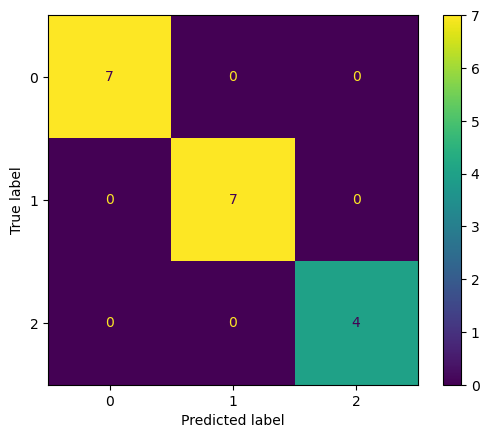

In [55]:
from sklearn.naive_bayes import GaussianNB

classification(GaussianNB(), X_train, y_train, X_test, y_test, {})

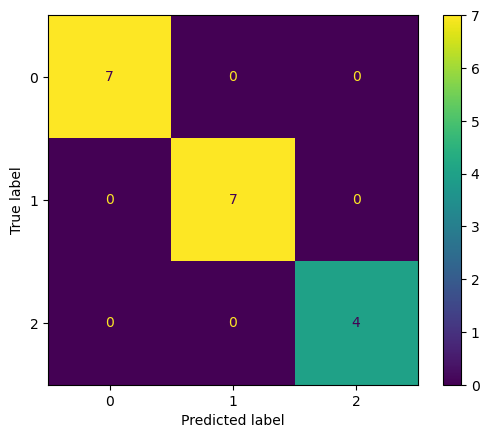

In [43]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

accuracy_score(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# Automobile Dataset

In [58]:
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 

In [59]:
df = pd.merge(X, y, left_index=True, right_index=True)
df.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


In [60]:
y.value_counts()

symboling
 0           67
 1           54
 2           32
 3           27
-1           22
-2            3
Name: count, dtype: int64

In [61]:
automobile.variables

,name,role,type,demographic,description,units,missing_values
0,price,Feature,Continuous,None,continuous from 5118 to 45400,None,yes
1,highway-mpg,Feature,Continuous,None,continuous from 16 to 54,None,no
2,city-mpg,Feature,Continuous,None,continuous from 13 to 49,None,no
3,peak-rpm,Feature,Continuous,None,continuous from 4150 to 6600,None,yes
4,horsepower,Feature,Continuous,None,continuous from 48 to 288,None,yes
5,compression-ratio,Feature,Continuous,None,continuous from 7 to 23,None,no
6,stroke,Feature,Continuous,None,continuous from 2.07 to 4.17,None,yes
7,bore,Feature,Continuous,None,continuous from 2.54 to 3.94,None,yes
8,fuel-system,Feature,Categorical,None,"1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi",None,no
9,engine-size,Feature,Continuous,None,continuous from 61 to 326,None,no


In [62]:
df.isna().sum()

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64

In [63]:
df.loc[df['num-of-doors'].isna() == True]

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
27,8558.0,30,24,5500.0,102.0,7.6,3.39,3.03,mpfi,98,...,93.7,front,fwd,sedan,NaN,turbo,gas,dodge,148.0,1
63,10795.0,42,36,4650.0,64.0,22.7,3.39,3.39,idi,122,...,98.8,front,fwd,sedan,NaN,std,diesel,mazda,NaN,0


In [64]:
df['num-of-doors'].fillna('four', inplace=True)

In [65]:
df.loc[df['num-of-doors'].isna() == True]

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling


In [66]:
df.loc[df['stroke'].isna() == True]

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
55,10945.0,23,17,6000.0,101.0,9.4,NaN,NaN,4bbl,70,...,95.3,front,rwd,hatchback,2.0,std,gas,mazda,150.0,3
56,11845.0,23,17,6000.0,101.0,9.4,NaN,NaN,4bbl,70,...,95.3,front,rwd,hatchback,2.0,std,gas,mazda,150.0,3
57,13645.0,23,17,6000.0,101.0,9.4,NaN,NaN,4bbl,70,...,95.3,front,rwd,hatchback,2.0,std,gas,mazda,150.0,3
58,15645.0,23,16,6000.0,135.0,9.4,NaN,NaN,mpfi,80,...,95.3,front,rwd,hatchback,2.0,std,gas,mazda,150.0,3


In [67]:
df.dropna(axis=0, inplace=True, subset=['stroke', 'bore'])

In [68]:
df.loc[df['stroke'].isna() == True]

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling


In [69]:
df.loc[df['price'].isna() == True]

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
9,NaN,22,16,5500.0,160.0,7.0,3.40,3.13,mpfi,131,...,99.5,front,4wd,hatchback,2.0,turbo,gas,audi,NaN,0
44,NaN,43,38,5400.0,70.0,9.6,3.11,3.03,2bbl,90,...,94.5,front,fwd,sedan,2.0,std,gas,isuzu,NaN,1
45,NaN,43,38,5400.0,70.0,9.6,3.11,3.03,2bbl,90,...,94.5,front,fwd,sedan,4.0,std,gas,isuzu,NaN,0
129,NaN,28,17,5750.0,288.0,10.0,3.11,3.94,mpfi,203,...,98.4,front,rwd,hatchback,2.0,std,gas,porsche,NaN,1


In [70]:
df.dropna(axis=0, inplace=True, subset=['price'])

In [71]:
df[df['peak-rpm'].isna() == True]

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
130,9295.0,31,23,NaN,NaN,8.7,3.9,3.46,mpfi,132,...,96.1,front,fwd,wagon,4.0,std,gas,renault,NaN,0
131,9895.0,31,23,NaN,NaN,8.7,3.9,3.46,mpfi,132,...,96.1,front,fwd,hatchback,2.0,std,gas,renault,NaN,2


In [72]:
df.dropna(axis=0, inplace=True, subset=['peak-rpm'])

In [73]:
df['normalized-losses'].fillna(df['normalized-losses'].median(), inplace=True)

In [74]:
df.isna().sum()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64

<Axes: xlabel='symboling', ylabel='count'>

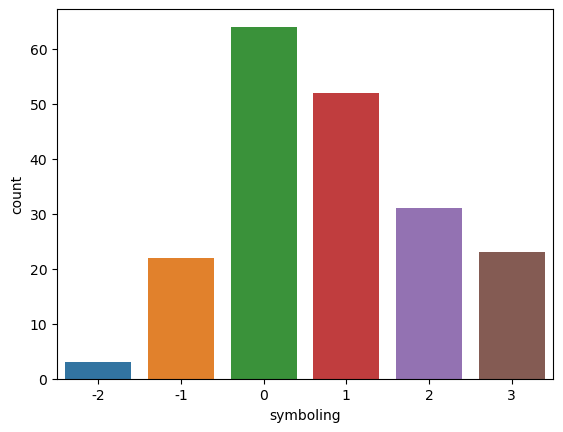

In [75]:
sns.countplot(data=df, x='symboling')

<Axes: >

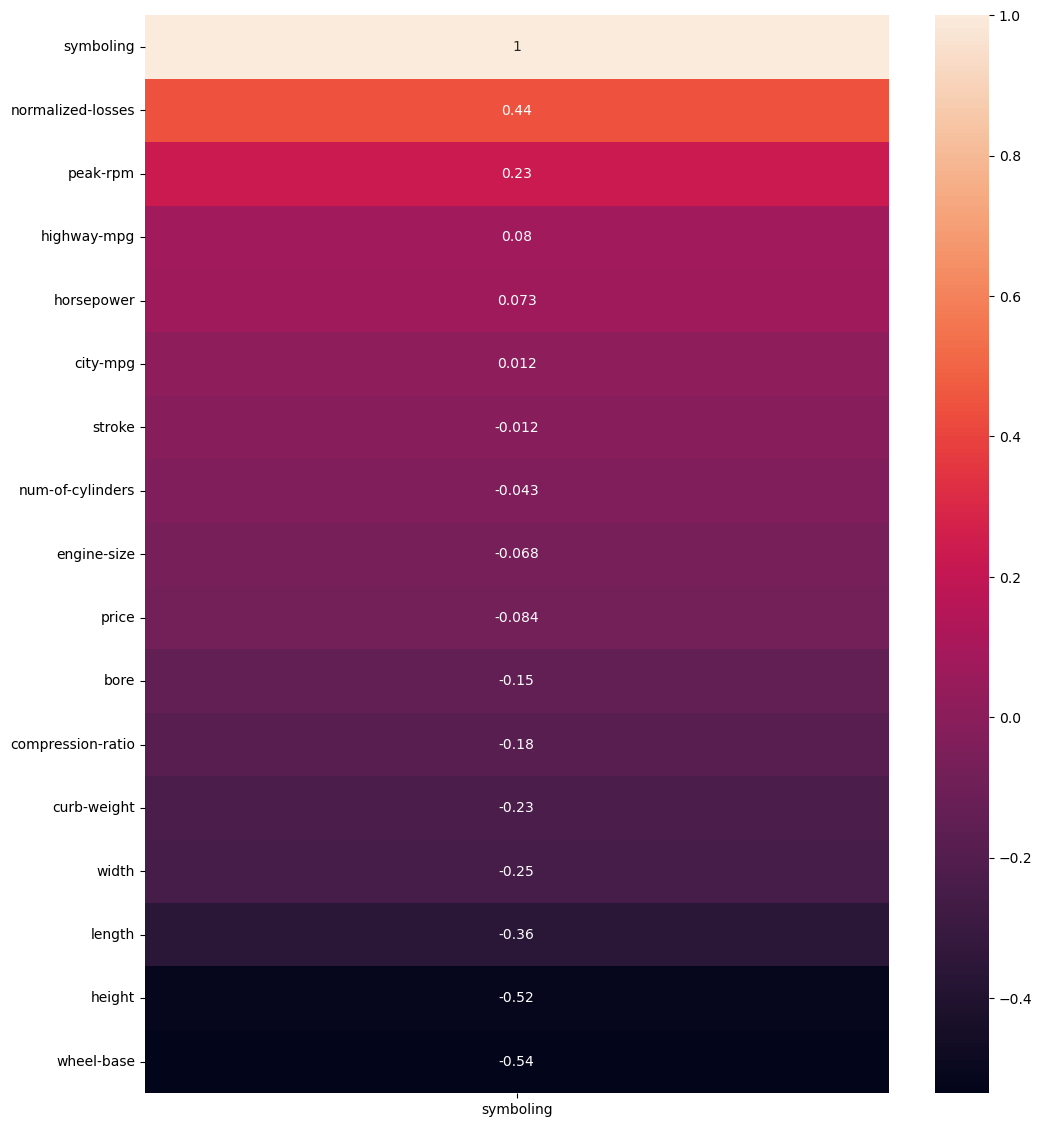

In [76]:
plt.figure(figsize=(12, 14))
sns.heatmap(df.corr(numeric_only=True)[['symboling']].sort_values(by='symboling', ascending=False), annot=True)

In [77]:
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df, drop_first=True)

X = df.drop('symboling', axis=1)
y = df['symboling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


Fitting 5 folds for each of 150 candidates, totalling 750 fits


d:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


0.85
              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.00      0.00      0.00         2
           0       0.80      0.80      0.80         5
           1       0.80      1.00      0.89         8
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.77      0.80      0.78        20
weighted avg       0.77      0.85      0.81        20

Height of the tree is :  10
DecisionTreeClassifier(max_depth=10)


d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.3682528409090909, 0.9545454545454546, 'x[33] <= 0.5\ngini = 0.768\nsamples = 175\nvalue = [2, 20, 59, 44, 29, 21]'),
 Text(0.22727272727272727, 0.8636363636363636, 'x[2] <= 23.5\ngini = 0.71\nsamples = 71\nvalue = [0, 0, 6, 25, 19, 21]'),
 Text(0.11363636363636363, 0.7727272727272727, 'x[14] <= 99.15\ngini = 0.451\nsamples = 25\nvalue = [0, 0, 3, 3, 1, 18]'),
 Text(0.06818181818181818, 0.6818181818181818, 'x[7] <= 2.925\ngini = 0.111\nsamples = 17\nvalue = [0, 0, 0, 1, 0, 16]'),
 Text(0.045454545454545456, 0.5909090909090909, 'x[9] <= 5.0\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 0, 1, 0, 1]'),
 Text(0.022727272727272728, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1]'),
 Text(0.06818181818181818, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.09090909090909091, 0.5909090909090909, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 0, 0, 0, 15]'),
 Text(0.1590909090909091, 0.6818181818181818, 'x[54] <= 0.5\ngini = 0.719\nsamples = 8\nvalue = [0, 0, 3, 2, 

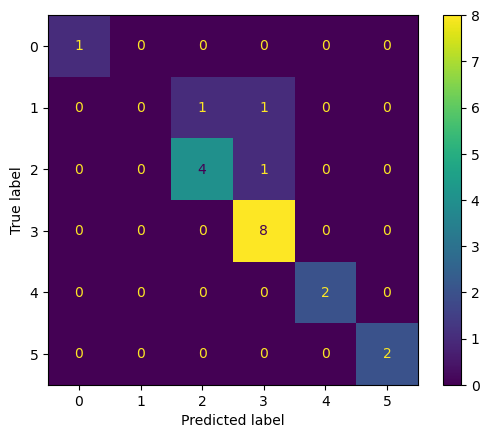

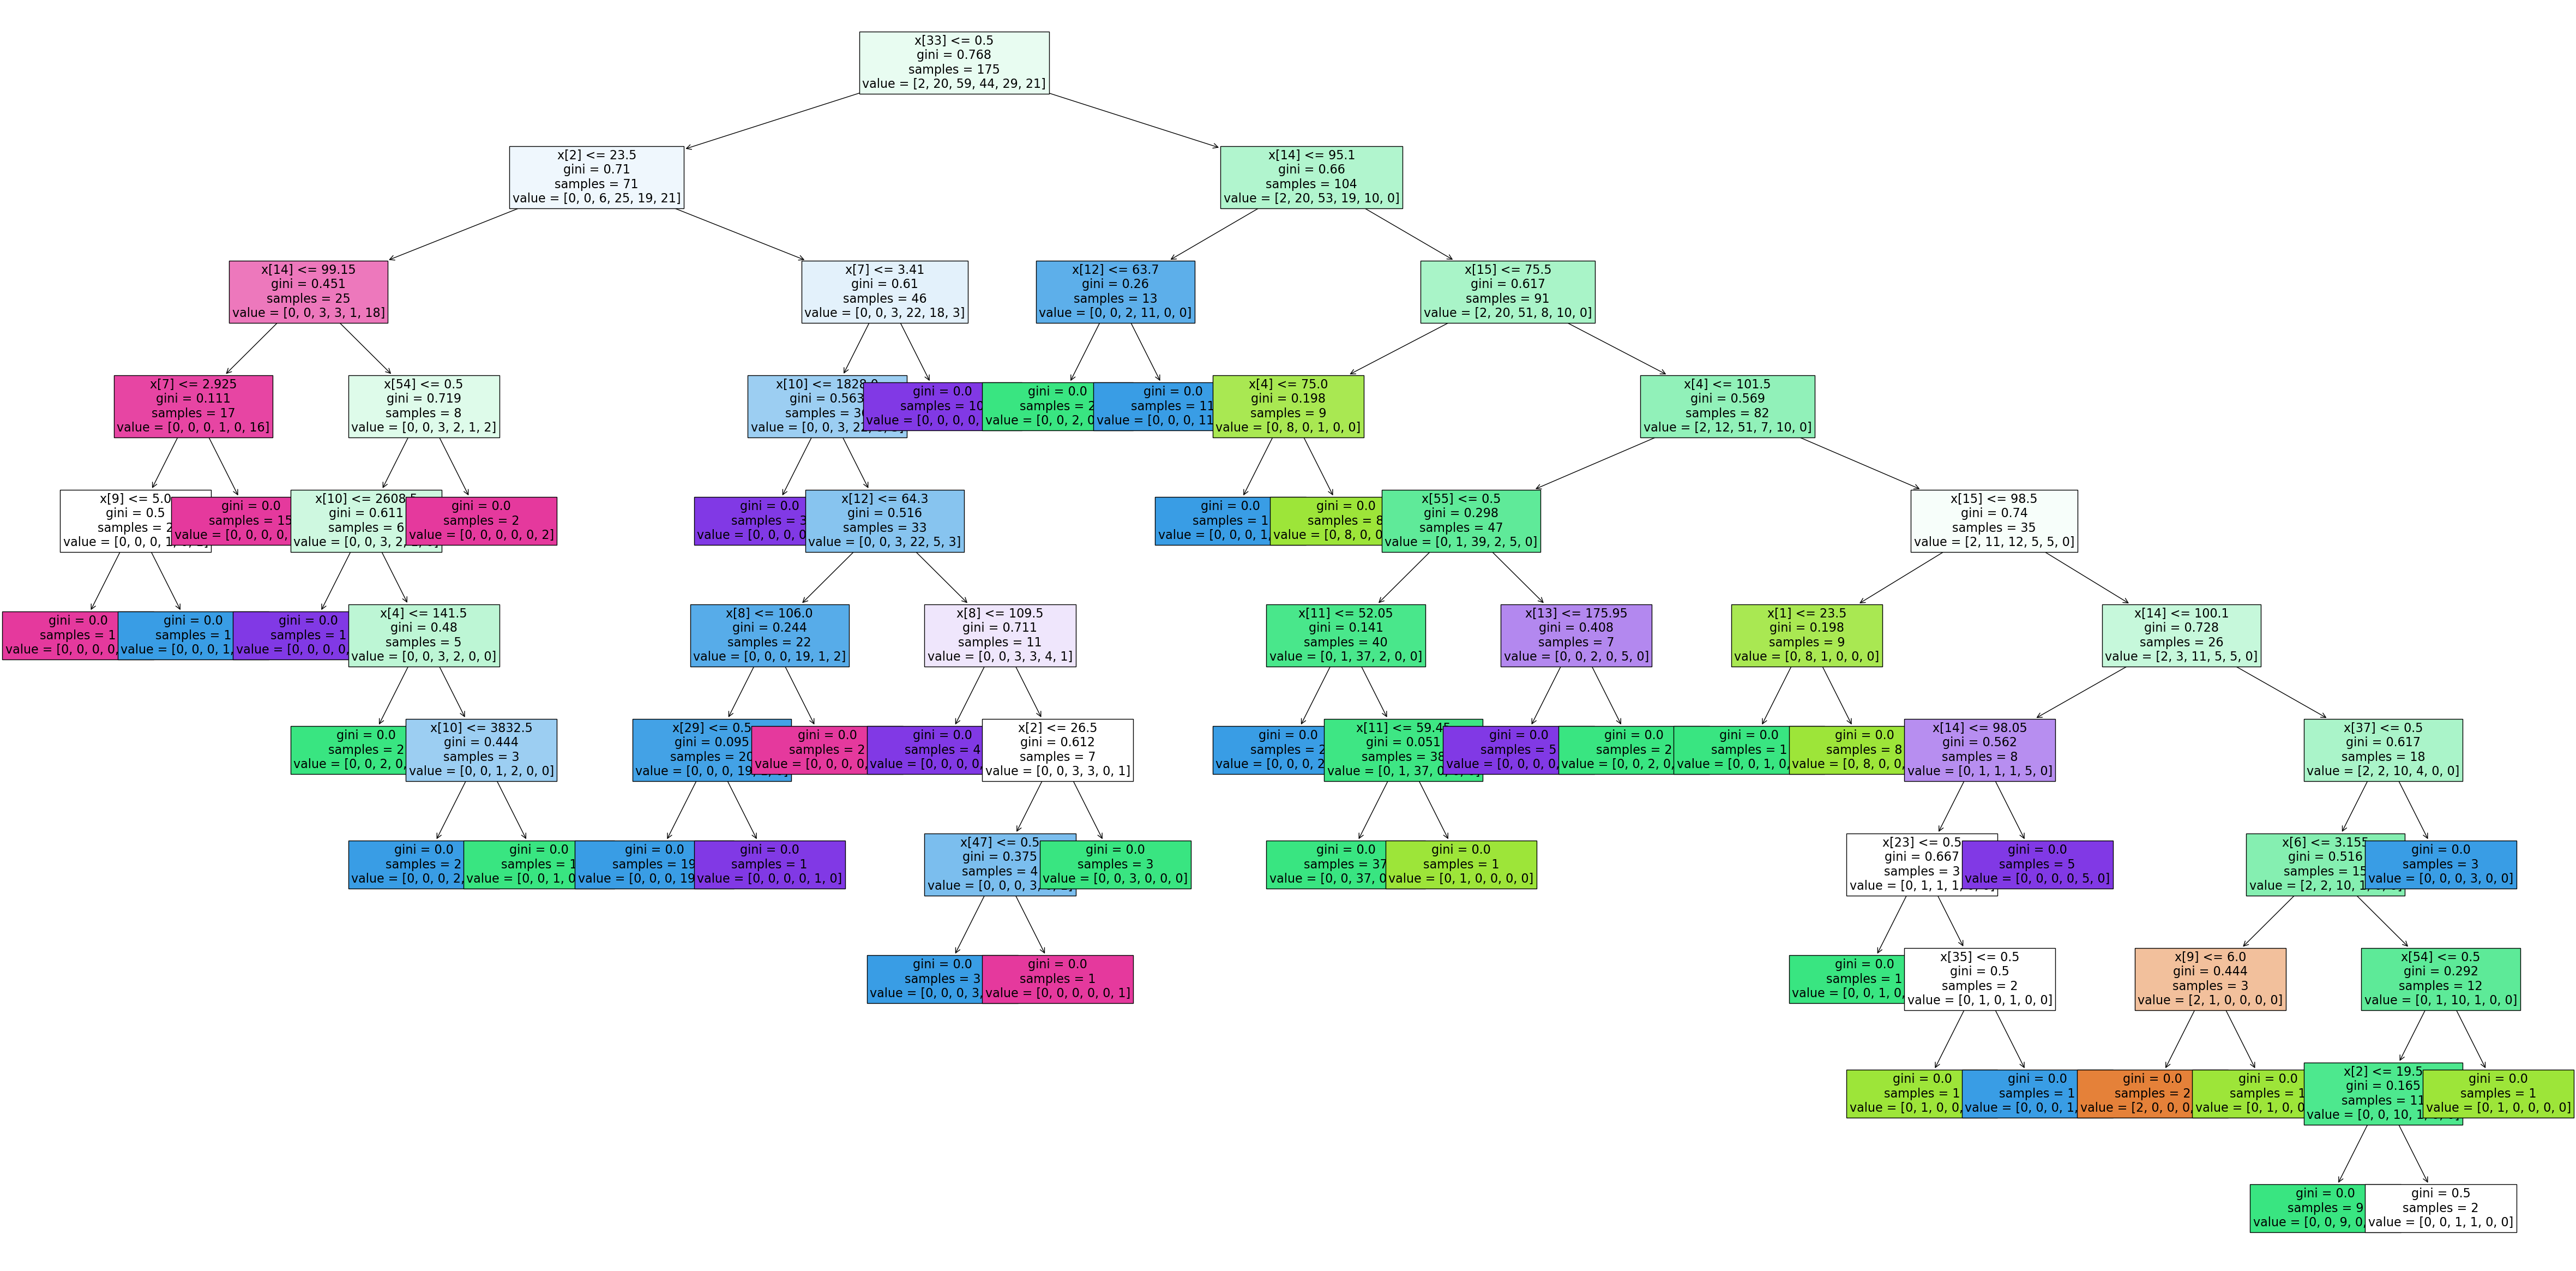

In [80]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20]
}

best_est = classification(DecisionTreeClassifier(criterion='gini'), X_train, y_train, X_test, y_test, param_grid)
plt.figure(figsize=(60, 30))
plot_tree(best_est, filled=True, fontsize=16)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


d:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.45714286        nan 0.42857143        nan 0.47428571
        nan 0.38857143        nan 0.45714286        nan 0.40571429
        nan 0.45142857        nan 0.4               nan 0.43428571
        nan 0.4       ]
  warnings.warn(


0.6
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         1
          -1       1.00      0.50      0.67         2
           0       0.50      0.60      0.55         5
           1       0.88      0.88      0.88         8
           2       0.00      0.00      0.00         2
           3       0.33      0.50      0.40         2

    accuracy                           0.60        20
   macro avg       0.45      0.41      0.41        20
weighted avg       0.61      0.60      0.59        20



d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

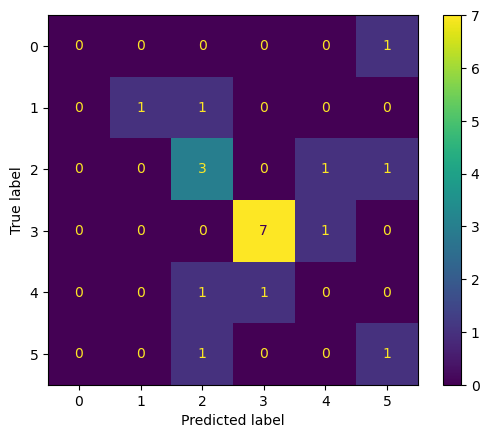

In [54]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

classification(KNeighborsClassifier(), X_train, y_train, X_test, y_test, param_grid)

d:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.65
              precision    recall  f1-score   support

          -2       1.00      1.00      1.00         1
          -1       0.67      1.00      0.80         2
           0       0.75      0.60      0.67         5
           1       0.71      0.62      0.67         8
           2       0.00      0.00      0.00         2
           3       0.67      1.00      0.80         2

    accuracy                           0.65        20
   macro avg       0.63      0.70      0.66        20
weighted avg       0.66      0.65      0.64        20



{}

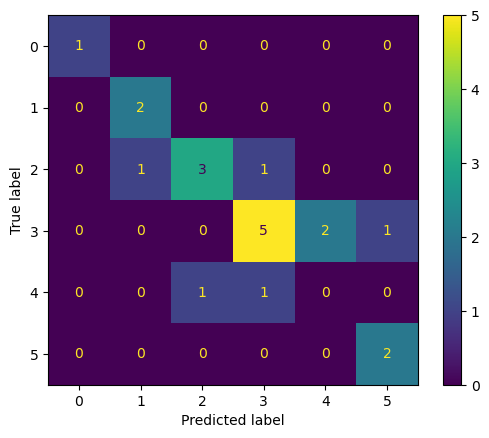

In [55]:
from sklearn.naive_bayes import GaussianNB

classification(GaussianNB(), X_train, y_train, X_test, y_test, {})

Fitting 5 folds for each of 32 candidates, totalling 160 fits


d:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


0.6
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         1
          -1       1.00      0.50      0.67         2
           0       0.40      0.80      0.53         5
           1       0.86      0.75      0.80         8
           2       0.00      0.00      0.00         2
           3       0.50      0.50      0.50         2

    accuracy                           0.60        20
   macro avg       0.46      0.42      0.42        20
weighted avg       0.59      0.60      0.57        20



d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

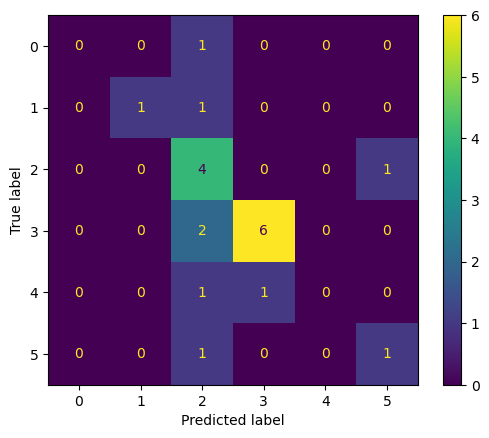

In [56]:
from sklearn.svm import SVC

svc = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale'],
    'kernel': ['rbf', 'poly'],
    'degree': [2, 3, 4, 5],
}

classification(svc, X_train, y_train, X_test, y_test, param_grid)